## **Gabriela Aguilar**
### Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
### Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.
### El presente proyecto analiza la base de datos "Travel Review Ratings" del repositorio de UC Irvine, con el objetivo de agrupar a los usuarios en “Perfiles de Viajero” según sus patrones de valoración en las distintas categorías de atracciones turísticas, con el fin de identificar segmentos de usuarios que comparten intereses y preferencias similares.

## **Definición del proyecto**
1. **Información base:** Se cuenta con 24 categorías referentes a diferentes tipos de atracciones turísticas en ciudades de Europa.

2. **Metodología:**
Mediante la aplicación de técnicas de clustering (agrupamiento no supervisado), se busca descubrir grupos o perfiles de usuarios que comparten preferencias afines —por ejemplo, usuarios que valoran altamente playas y parques, o aquellos que prefieren museos y actividades culturales. Esta segmentación permitirá:

- Comprender mejor los distintos tipos de viajeros presentes en la base de datos.

- Personalizar recomendaciones de destinos, actividades y promociones para cada perfil.

- Apoyar el diseño de productos turísticos adaptados a los intereses detectados.

- Optimizar estrategias de marketing y comunicación, orientándolas a las motivaciones de cada grupo identificado.

# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [50]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, accuracy_score, mean_absolute_error, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



In [51]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [52]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [53]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

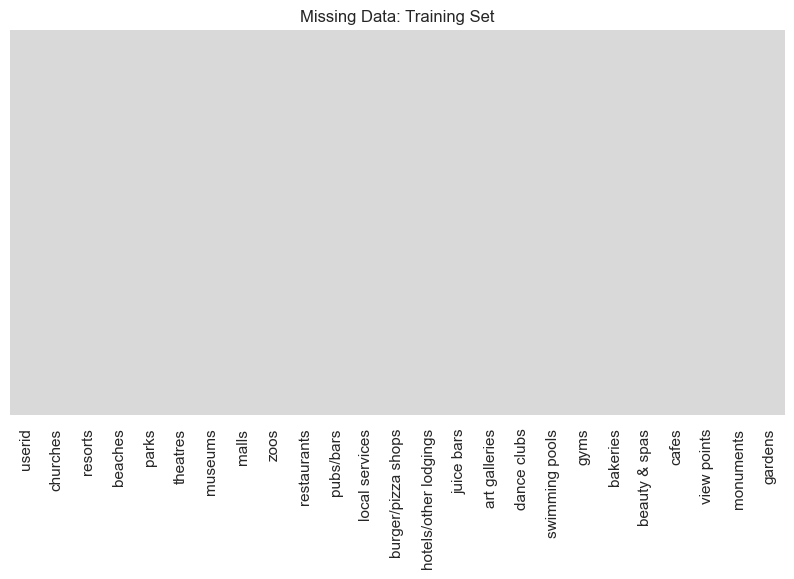

In [54]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [55]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


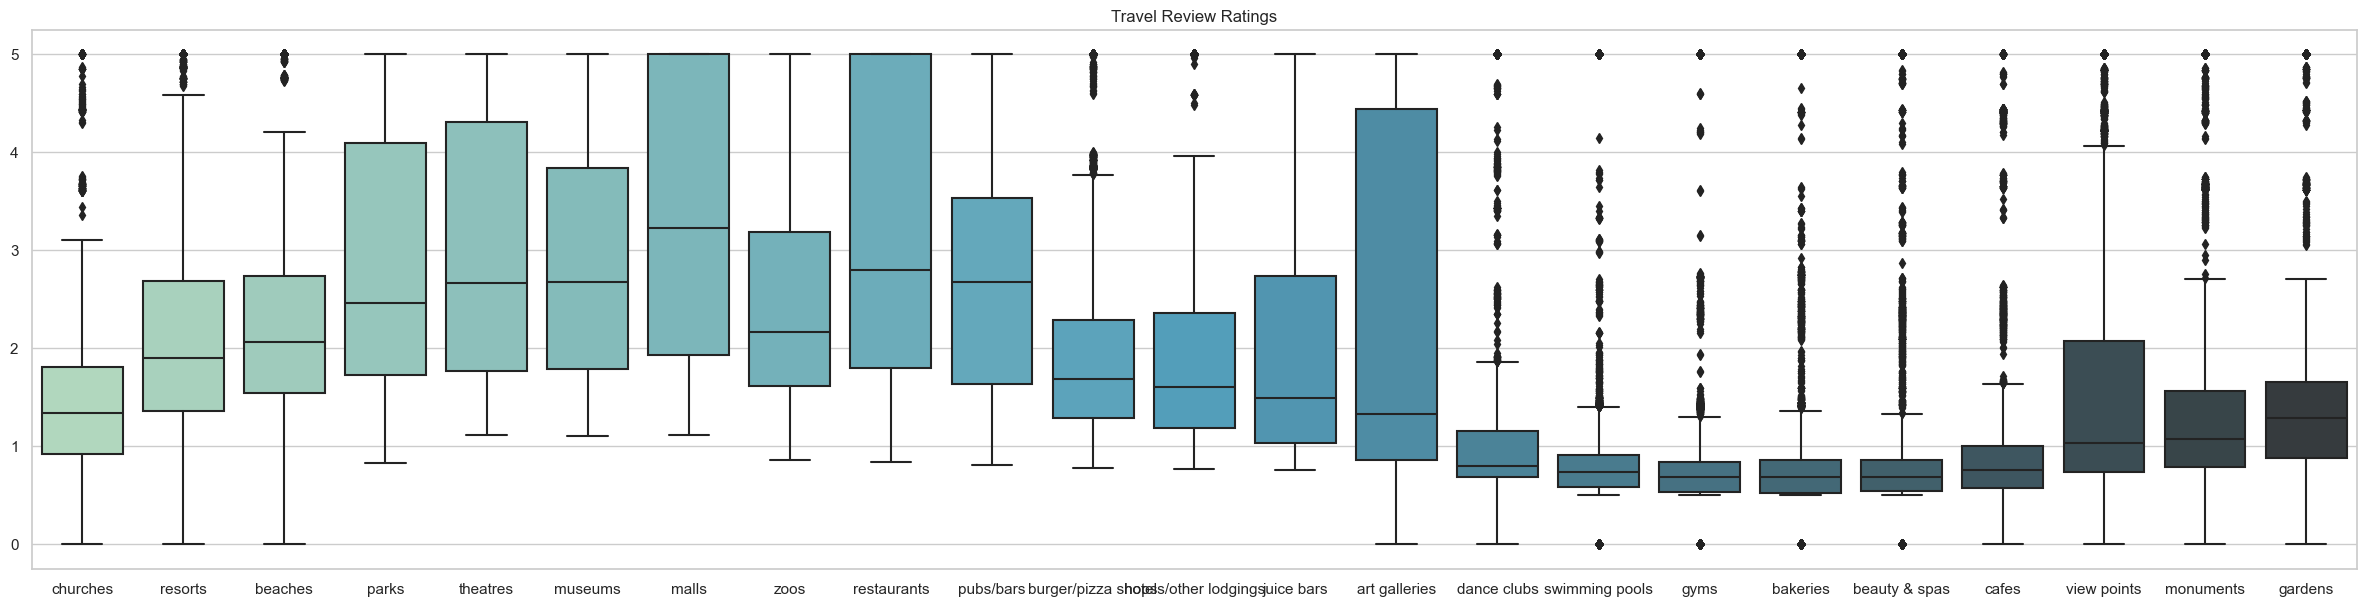

In [56]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

Las categorías 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens', 'churches', 'resorts', 'beaches', 'burger/pizza shops' y 'hotels/other lodgings' presentan valores atípicos que se desvían del rango habitual de calificaciones dentro de estas categorías.

Adicionalmente, las categorías 'malls', 'restaurants' y 'art galleries' muestran indicios de calificaciones elevadas, con algunos valores que superan el rango medio.

In [57]:
# Identificación de valores duplicados

print('Filas duplicadas:', datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

Filas duplicadas: 0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [58]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
datos['local services'] = pd.to_numeric(datos['local services'], errors='coerce')   # Convierte valor de '\t' a NaN
datos['local services'] = datos['local services'].fillna(datos['local services'].median())
datos['local services'] = datos['local services'].astype('float')

# Corrección de datos Null
# burger/pizza shops
datos['burger/pizza shops'].fillna(datos['burger/pizza shops'].median(), inplace = True)

# gardens
datos['gardens'].fillna(datos['gardens'].median(), inplace = True)

In [59]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [60]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [61]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [62]:
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560706
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171655
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Las categorias con promedios de ratings más altos son Avg_Malls, Avg_Restaurants, y Avg_Theatres.

Las categorias con promedios de ratings más bajos son Avg_Gyms, Avg_Swimming pools, y Avg_Beauty & spas.



In [63]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [64]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [65]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [66]:
# Melt a las columnas con ratings, manteniendo User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,Unique user id,Category,Rating
0,User 1,Churches,0
1,User 2,Churches,0
2,User 3,Churches,0
3,User 4,Churches,0
4,User 5,Churches,0
...,...,...,...
130939,User 5452,Gardens,2
130940,User 5453,Gardens,1
130941,User 5454,Gardens,1
130942,User 5455,Gardens,1


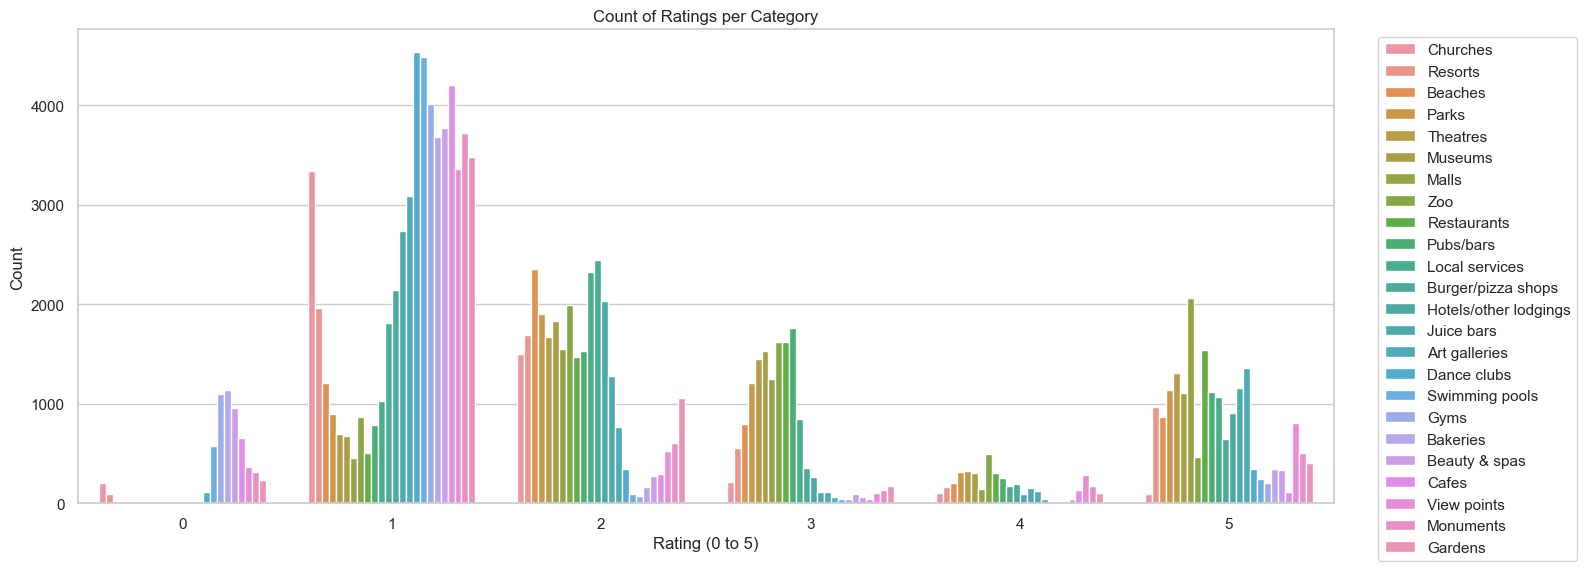

In [67]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

Se observa una concentración de calificaciones bajas en muchas categorías. En particular, Beauty & Spa, Dance Clubs, Swimming Pools y Gyms muestran una alta concentración de calificaciones entre 1 y 2. De lo contrario, Malls, Restaurants y Theatres presentan una distribución más equilibrada y una mayor proporción de calificaciones altas (3–5), lo que indica un mejor desempeño. 

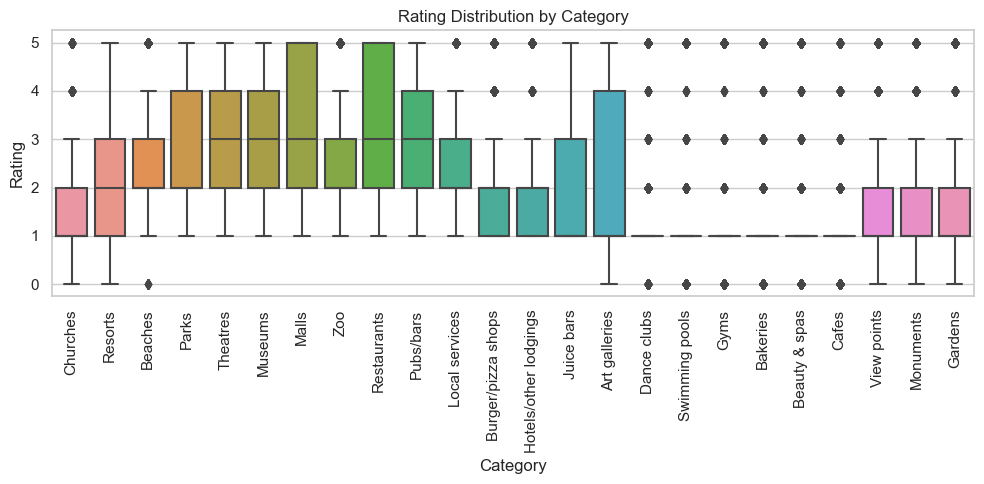

In [68]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

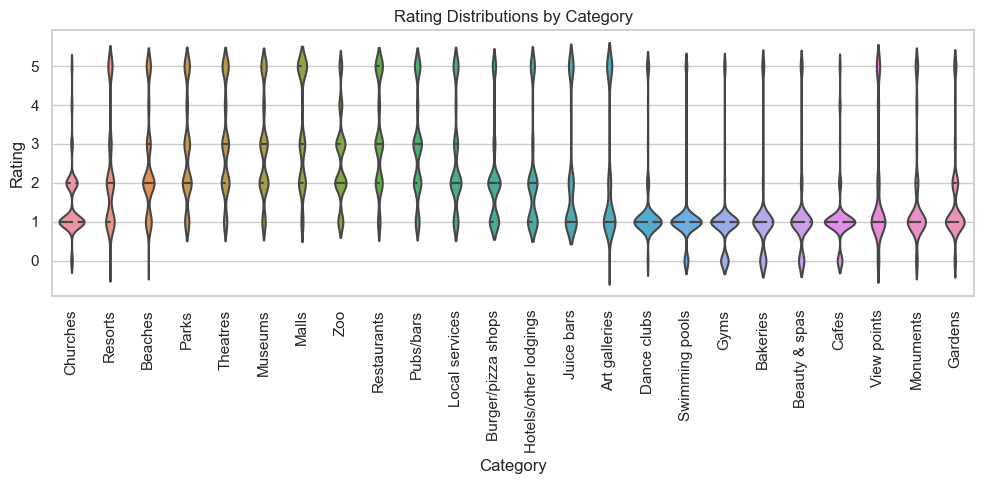

In [69]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

Esta gráfica muestra la densidad de las valoraciones en cada categoría. Por ejemplo, Malls y Restaurants presentan una mayor concentración de valoraciones de rango medio-alto, mientras que Dance Clubs, Beauty & Spas, Swimming Pools y Gyms concentran la densidad en valores bajos. De igual forma, Cafes y Beauty & Spas muestran una densidad enfocada en las calificaciones más bajas.

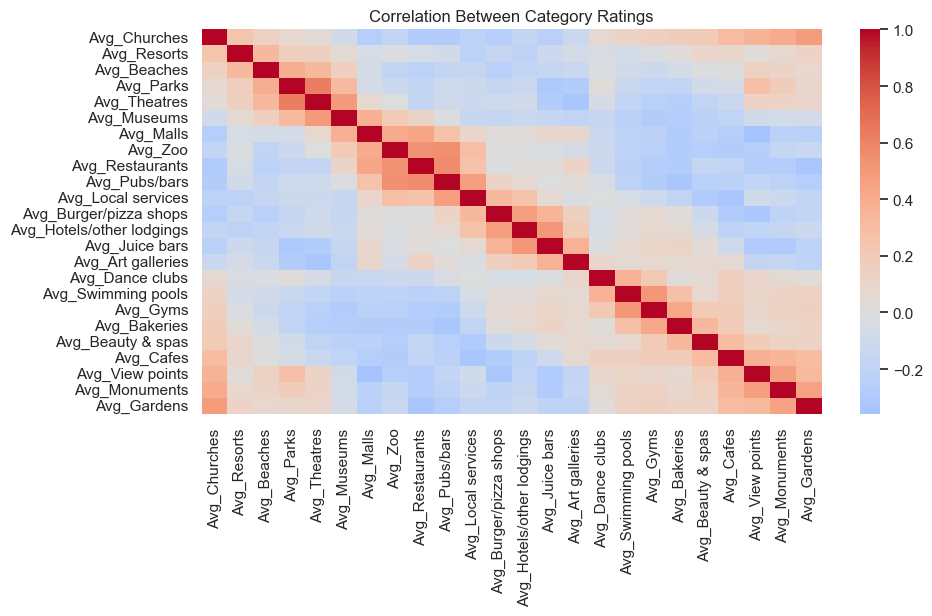

In [70]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

Se observa una correlación marcada entre Malls, Restaurants, Parks y Museums, lo que sugiere que los usuarios los valoran de forma similar. Por su parte, Swimming Pools, Beauty & Spas, Cafes y Dance Clubs presentan correlaciones débiles con el resto, reflejando preferencias más independientes o un desagrado más común. Finalmente, Art Galleries y Juice Bars aparecen aislados, lo que indica gustos muy específicos.

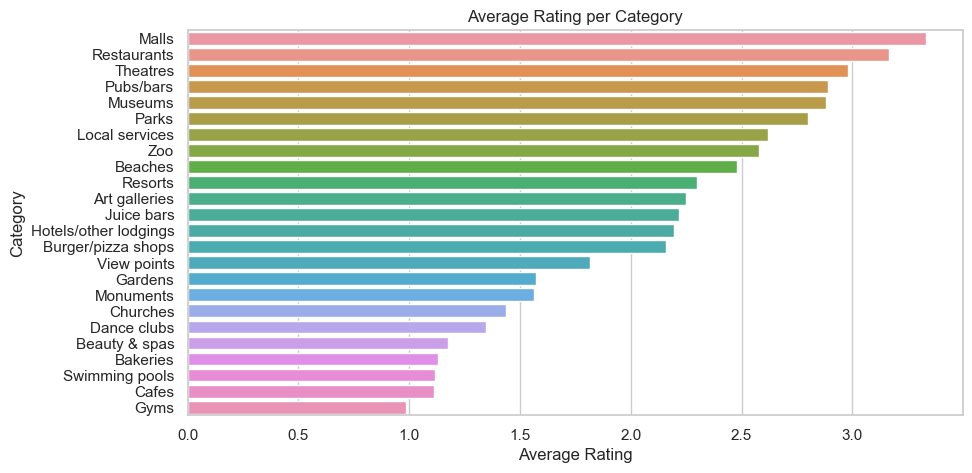

In [71]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


In [72]:
# Standarización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(CNum)

## K-means

K-means clustering es un algoritmo de agrupamiento, un método de aprendizaje no supervisado, que divide un conjunto de datos en k grupos o clústeres. El objetivo es minimizar la distancia entre cada punto de datos y el centroide (o media) de su clúster asignado. 

In [73]:
n_clusters = 4  # Prueba de clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Labels de cluster a la Base de Datos
datos['cluster'] = clusters

In [74]:
datos['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
5451    1
5452    2
5453    1
5454    1
5455    1
Name: cluster, Length: 5456, dtype: int32

In [75]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

El análisis de componentes principales, o PCA, reduce el número de dimensiones en grandes conjuntos de datos a componentes principales que conservan la mayor parte de la información original.

PCA se utiliza para reducir la dimensionalidad de los datos y facilitar la visualización de los clústeres generados por el algoritmo de clustering en un gráfico 2D fácil de interpretar.

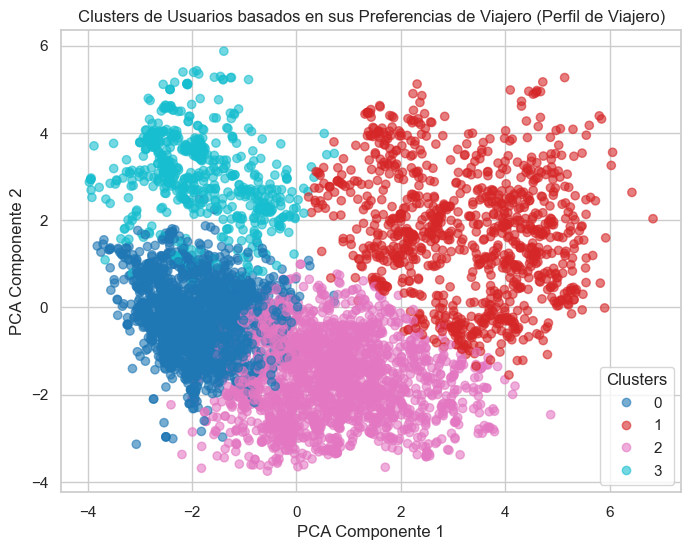

In [76]:
pca = PCA(n_components=2) # Simplifica las 24 categorías de cada usuario y las transforma en 2 dimensiones principales que contienen la mayor parte de la información (los “componentes principales”).
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.title("Clusters de Usuarios basados en sus Preferencias de Viajero (Perfil de Viajero)")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Cada punto es un usuario y el color representa el clúster al que pertenece.



Ahora para obtener las categorías que caracterizan a cada Cluster:

In [77]:
import numpy as np

category_names = [
    "churches", "resorts", "beaches", "parks", "theatres", "museums", "malls",
    "zoo", "restaurants", "pubs_bars", "local_services", "burger_pizza_shops", 
    "hotels_other_lodgings", "juice_bars", "art_galleries", "dance_clubs",
    "swimming_pools", "gyms", "bakeries", "beauty_spas", "cafes", "view_points",
    "monuments", "gardens"
]

# Obtiene los centroides de cada clúster y los des-normaliza (vuelve a la escala original).
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# 3 categorías con los valores más altos, 3 categorías con los valores más bajos, para poder dar el perfil "nombre" de Viajero.
for i, center in enumerate(centroids):
    print(f"\nCluster {i}:")
    top_categories = np.argsort(center)[-3:][::-1]
    print("  Top categorías:", [category_names[j] for j in top_categories])
    bottom_categories = np.argsort(center)[:3]
    print(" Últimas categorías:", [category_names[j] for j in bottom_categories])



Cluster 0:
  Top categorías: ['restaurants', 'malls', 'pubs_bars']
 Últimas categorías: ['gyms', 'bakeries', 'beauty_spas']

Cluster 1:
  Top categorías: ['view_points', 'resorts', 'gardens']
 Últimas categorías: ['burger_pizza_shops', 'hotels_other_lodgings', 'local_services']

Cluster 2:
  Top categorías: ['theatres', 'parks', 'museums']
 Últimas categorías: ['gyms', 'bakeries', 'swimming_pools']

Cluster 3:
  Top categorías: ['juice_bars', 'hotels_other_lodgings', 'burger_pizza_shops']
 Últimas categorías: ['monuments', 'cafes', 'view_points']


In [78]:
cluster_labels = {
    0: "Viajero Urbano",
    1: "Buscador de Relax",
    2: "Amante del Arte y la Historia",
    3: "Foodie Lovers"
}

datos['cluster_label'] = datos['cluster'].map(cluster_labels)

Calinski-Harabasz Score: Esta métrica evalúa qué tan bien definidos están los clústeres.

Cuanto más alto es el valor, mejor es la separación y cohesión de los clústeres (es decir, los datos dentro de cada clúster están muy juntos y los diferentes clústeres están bien separados).

In [79]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = calinski_harabasz_score(X_scaled, kmeans_labels)
print("KMeans CH Score:", kmeans_score)

KMeans CH Score: 767.1371020128546


## AgglomerativeClustering

La agrupación aglomerativa es un algoritmo de agrupación jerárquica que se utiliza para agrupar puntos de datos similares en clústeres. Se trata de un enfoque ascendente que comienza tratando cada punto de datos como un único clúster y luego fusiona el par de clústeres más cercano hasta que todos los puntos de datos se agrupan en un único clúster o en un número predefinido de clústeres.

In [80]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4) # Crea un modelo de Agglomerative Clustering configurado para encontrar 4 clústeres (agrupaciones) en los datos
agglo_labels = agglo.fit_predict(X_scaled) # asigna a cada punto una etiqueta de clúster, indicando a qué grupo pertenece
agglo_score = calinski_harabasz_score(X_scaled, agglo_labels)
print("Agglomerative Clustering CH Score:", agglo_score)

Agglomerative Clustering CH Score: 677.5861968899375


## DBSCAN


DBSCAN, que significa "Density-Based Spatial Clustering of Applications with Noise" (Agrupamiento Espacial Basado en Densidad de Aplicaciones con Ruido), es un algoritmo de aprendizaje no supervisado para la agrupación de datos. El algoritmo funciona definiendo clústeres como regiones densas de puntos, separadas por regiones de menor densidad. 

In [81]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
# eps=2: distancia máxima entre dos puntos para que sean considerados parte del mismo grupo.
# min_samples=5: número mínimo de puntos necesarios para formar un clúster denso.
dbscan_labels = dbscan.fit_predict(X_scaled)
# Filtra los puntos de "ruido" para la generación de los clusters
mask = dbscan_labels != -1 # Los puntos considerados "ruido" reciben la etiqueta -1.
if sum(mask) > 1 and len(set(dbscan_labels[mask])) > 1:
    dbscan_score = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN CH Score (excluding noise):", dbscan_score)
else:
    dbscan_score = None
    print("DBSCAN did not form valid clusters for CH scoring.")

DBSCAN CH Score (excluding noise): 110.35313021899066


In [82]:
print("\nComparison:")
print(f"KMeans:         {kmeans_score:.2f}")
print(f"Agglomerative:  {agglo_score:.2f}")
if dbscan_score:
    print(f"DBSCAN:         {dbscan_score:.2f}")
else:
    print("DBSCAN:         N/A (insufficient clusters or all noise)")



Comparison:
KMeans:         767.14
Agglomerative:  677.59
DBSCAN:         110.35


## Optuna KMeans

In [83]:
import optuna

def objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 10) # Optuna probará distintos valores enteros para n_clusters entre 2 y 10
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    return score

study = optuna.create_study(direction='maximize') # Crea un estudio donde el objetivo es maximizar la métrica (en este caso, el CH Score)
study.optimize(objective, n_trials=20)
best_clusters = study.best_params['n_clusters'] # Obtiene el número de clústeres que produjo el mejor resultado según Optuna
print(f"\nOptuna best n_clusters: {best_clusters}")

# Ajuste de KMeans a los mejores clusters
opt_kmeans = KMeans(n_clusters=best_clusters, random_state=42)
opt_kmeans_labels = opt_kmeans.fit_predict(X_scaled)
opt_kmeans_score = calinski_harabasz_score(X_scaled, opt_kmeans_labels)
print(f"Optimized KMeans CH Score: {opt_kmeans_score:.2f}")


[I 2025-06-04 00:40:41,687] A new study created in memory with name: no-name-61b8ddd8-ea48-45aa-8885-ac5b1758fc23
[I 2025-06-04 00:40:42,215] Trial 0 finished with value: 767.1371020128546 and parameters: {'n_clusters': 4}. Best is trial 0 with value: 767.1371020128546.
[I 2025-06-04 00:40:42,708] Trial 1 finished with value: 852.416923169947 and parameters: {'n_clusters': 3}. Best is trial 1 with value: 852.416923169947.
[I 2025-06-04 00:40:43,176] Trial 2 finished with value: 676.7661023750295 and parameters: {'n_clusters': 5}. Best is trial 1 with value: 852.416923169947.
[I 2025-06-04 00:40:43,651] Trial 3 finished with value: 676.7661023750295 and parameters: {'n_clusters': 5}. Best is trial 1 with value: 852.416923169947.
[I 2025-06-04 00:40:44,140] Trial 4 finished with value: 584.0691499867282 and parameters: {'n_clusters': 7}. Best is trial 1 with value: 852.416923169947.
[I 2025-06-04 00:40:44,652] Trial 5 finished with value: 492.31802914719873 and parameters: {'n_clusters':


Optuna best n_clusters: 2
Optimized KMeans CH Score: 907.26


Comparativa entre modelos de Cluster

In [84]:
print("\nSummary Table")
print(f"{'Model':<20}{'Clusters':<10}{'CH Score':<10}")
print(f"{'KMeans':<20}{4:<10}{kmeans_score:.2f}")
print(f"{'Agglomerative':<20}{4:<10}{agglo_score:.2f}")
if dbscan_score:
    print(f"{'DBSCAN':<20}{'Varies':<10}{dbscan_score:.2f}")
else:
    print(f"{'DBSCAN':<20}{'N/A':<10}{'N/A'}")
print(f"{'Optuna KMeans':<20}{best_clusters:<10}{opt_kmeans_score:.2f}")



Summary Table
Model               Clusters  CH Score  
KMeans              4         767.14
Agglomerative       4         677.59
DBSCAN              Varies    110.35
Optuna KMeans       2         907.26


## Ajuste Final de Modelo según resultados de Optuna

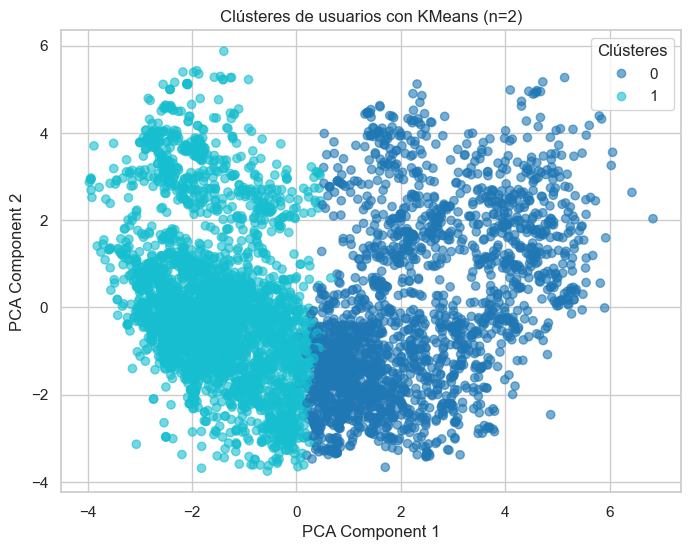

In [85]:
# 1. Reduce los datos a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Crea el scatter plot con los labels de los clústeres
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=opt_kmeans_labels, cmap='tab10', alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Clústeres de usuarios con KMeans (n={best_clusters})")
plt.legend(*scatter.legend_elements(), title="Clústeres")
plt.show()

In [86]:
# 1. Lleva los centroides a la escala original
centroids_original = scaler.inverse_transform(opt_kmeans.cluster_centers_)

# 2. Para cada clúster, imprime las top 3 y bottom 3 categorías
for i, centroid in enumerate(centroids_original):
    print(f"\nCluster {i}:")
    # Top 3 preferencias
    top_idx = np.argsort(centroid)[-3:][::-1]
    print("  Top preferences:", [category_names[j] for j in top_idx])
    # Bottom 3 (menos interés)
    bottom_idx = np.argsort(centroid)[:3]
    print("  Least interested in:", [category_names[j] for j in bottom_idx])


Cluster 0:
  Top preferences: ['parks', 'theatres', 'beaches']
  Least interested in: ['gyms', 'swimming_pools', 'cafes']

Cluster 1:
  Top preferences: ['malls', 'restaurants', 'pubs_bars']
  Least interested in: ['gyms', 'bakeries', 'cafes']


In [87]:
profile_names = [
    "Amante de la Naturaleza y la Cultura",     # Cluster 0
    "Viajero Urbano y Social",            # Cluster 1
]

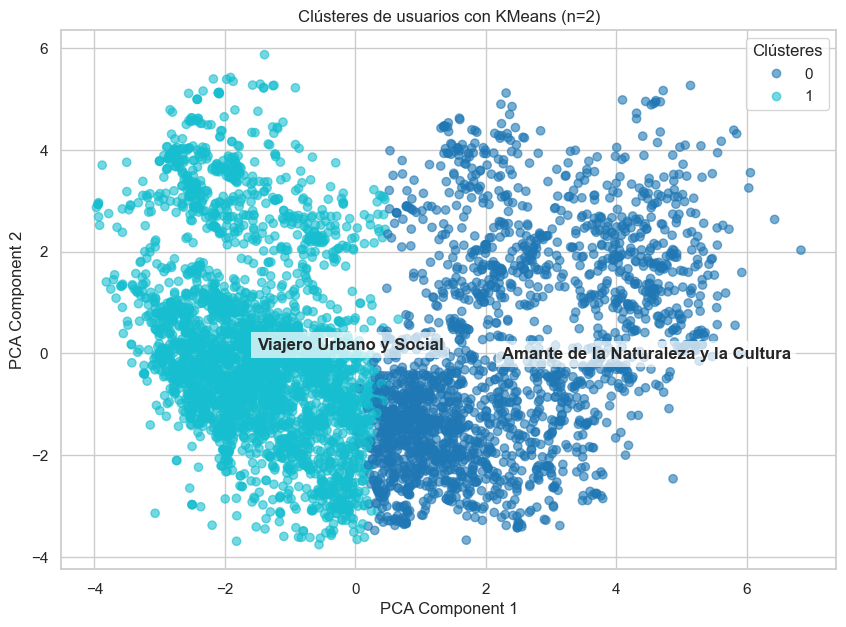

In [88]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=opt_kmeans_labels, cmap='tab10', alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Clústeres de usuarios con KMeans (n={best_clusters})")

# Etiqueta con el nombre del perfil en el centroide de cada cluster
centroids_2d = pca.transform(opt_kmeans.cluster_centers_)
for i, (x, y) in enumerate(centroids_2d):
    name = profile_names[i] if i < len(profile_names) else f"Perfil {i}"
    plt.text(x, y, name, fontsize=12, weight='bold', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.legend(*scatter.legend_elements(), title="Clústeres")
plt.show()

## Test Run con Data Supuesta

In [ ]:
# 1. Crear un usuario ficticio con calificaciones para las 24 categorías
dummy_ratings = np.array([
    4, 2, 3, 1,  # Ejemplo
    5, 4, 1, 2,  # hasta tener 24 valores
    3, 3, 5, 2,
    1, 5, 4, 2,
    2, 4, 3, 1,
    5, 3, 2, 1
]).reshape(1, -1)  # tamaño (1, 24)

# 2. Escalar los datos como lo requiere el modelo
dummy_scaled = scaler.transform(dummy_ratings)

# 3. Predecir a qué clúster pertenece este usuario ficticio
dummy_cluster = opt_kmeans.predict(dummy_scaled)[0]

# 4. Imprimir el resultado en español
print(f"El usuario ficticio fue asignado al clúster: {dummy_cluster}")
if dummy_cluster < len(profile_names):
    print("Perfil asignado:", profile_names[dummy_cluster])
else:
    print("Perfil asignado: Perfil", dummy_cluster)

# 5. Mostrar las 3 categorías más y menos valoradas de ese clúster
centroide = centroids_original[dummy_cluster]
top_idx = np.argsort(centroide)[-3:][::-1]
bottom_idx = np.argsort(centroide)[:3]
print("Categorías favoritas del perfil:", [category_names[j] for j in top_idx])
print("Categorías de menor interés del perfil:", [category_names[j] for j in bottom_idx])


El usuario ficticio fue asignado al clúster: 0
Perfil asignado: Amante de la Naturaleza y la Cultura
Categorías favoritas del perfil: ['parks', 'theatres', 'beaches']
Categorías de menor interés del perfil: ['gyms', 'swimming_pools', 'cafes']
